<a href="https://colab.research.google.com/github/brooke57/TKR_FLT3_Drug_Discovery/blob/main/Drug_Discovery_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TKR_FLT3 Drug Discovery Modeling**

In [ ]:
! pip install lazypredict

In [ ]:
! pip install rdkit-pypi

In [3]:
# Importing Relevant Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline

#import category_encoders as ce

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, plot_roc_curve, plot_confusion_matrix
from sklearn.metrics import confusion_matrix

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors

from sklearn.feature_selection import VarianceThreshold

#from lazypredict.Supervised import LazyClassifier

#from rdkit import Chem
#from rdkit.Chem import AllChem, Draw

# import xgboost     # extreme gradient boosting


In [78]:
import sklearn
sklearn. __version__

'1.0.2'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_cmbd = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Model_Dataset.csv')

In [5]:
df_cmbd.head()

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP879,PubchemFP880,mol_id,canon_smiles,MolWt,MolLogP,NumHDonors,NumHAcceptors,bioactivity_num,log_std_value
0,CHEMBL124660,1,1,1,1,0,0,0,0,0,...,0,0,CHEMBL124660,COc1cc2c(N3CCN(C(=O)Nc4ccc(OC(C)C)cc4)CC3)ncnc...,562.715,5.03450,1,8,1,6.657577
1,CHEMBL330863,1,1,1,1,0,0,0,0,0,...,0,0,CHEMBL330863,COc1cc2c(N3CCN(C(=O)Nc4ccc(OC(C)C)cc4)CC3)ncnc...,576.742,5.28050,1,8,1,6.892790
2,CHEMBL126699,1,1,1,1,0,0,0,0,0,...,0,0,CHEMBL126699,COc1cc2c(N3CCN(C(=O)Nc4ccc(C#N)cc4)CC3)ncnc2cc...,543.672,4.50748,1,8,0,5.056011
3,CHEMBL445636,1,1,1,1,0,0,0,0,0,...,0,0,CHEMBL445636,COc1cc2c(N3CCN(C(=O)Nc4ccc(C#N)cc4)CC3)ncnc2cc...,543.672,4.36498,1,8,0,5.718967
4,CHEMBL124035,1,1,1,1,0,0,0,0,0,...,0,0,CHEMBL124035,COCCOc1cc2ncnc(N3CCN(C(=O)Nc4ccc(OC(C)C)cc4)CC...,495.580,3.80490,1,8,1,6.346787


In [6]:
df_cmbd.set_index('Name', inplace=True)

In [7]:
drop = ['mol_id', 'canon_smiles', 'MolWt', 'MolLogP', 'NumHDonors', 'NumHAcceptors', 'log_std_value', 'log_std_value', 'bioactivity_num']

In [8]:
# Features dataframe
X = df_cmbd.drop(drop, axis=1)
X.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
Name,,,,,,,,,,,,,,,,,,,,,
CHEMBL124660,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
CHEMBL330863,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
CHEMBL126699,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
CHEMBL445636,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
CHEMBL124035,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X.shape

(2844, 881)

In [10]:
# Target dataframe
y = df_cmbd['bioactivity_num']

In [11]:
y.shape

(2844,)

### **Train Test Split**

In [12]:
# Setting aside 10% of data for a holdout set to be tested on final model
X_train, X_hold, y_train, y_hold, ind_train, ind_hold = train_test_split(X,y, 
                                                                         X.index,
                                                                         test_size=0.1, random_state=42)

In [13]:
# Train test split for training and testing data
X_tr, X_te, y_tr, y_te, ind_tr, ind_te = train_test_split(X_train, y_train,
                                                          X_train.index,
                                                          test_size=0.2,
                                                          random_state=42)

In [14]:
X_tr.shape

(2047, 881)

In [15]:
y_tr.shape

(2047,)

### **Remove Low Variance Features**

In [16]:
select = VarianceThreshold(threshold = (0.8 * (1 - 0.8)))
select.fit(X_tr)

cols = select.get_support(indices=True)
X_tr = X_tr[X_tr.columns[cols]]
X_te = X_te[X_te.columns[cols]]
X_hold = X_hold[X_hold.columns[cols]]

In [17]:
X_train.to_csv('/content/drive/MyDrive/Colab Notebooks/data/X_features.csv')

In [18]:
# Making sure that X_tr has the same number of rows as y_tr
x_tr_shape = X_tr.shape
y_tr_shape = y_tr.shape
print(f'X_tr shape: {x_tr_shape}')
print(f'y_tr shape: {y_tr_shape}')

X_tr shape: (2047, 149)
y_tr shape: (2047,)


In [19]:
# Making sure that X_te has the same number of rows as y_te
x_te_shape = X_te.shape
y_te_shape = y_te.shape
print(f'X_te shape: {x_te_shape}')
print(f'y_te shape: {y_te_shape}')

X_te shape: (512, 149)
y_te shape: (512,)


In [20]:
# Making sure that X_hold has the same number of rows as y_hold
x_hold_shape = X_hold.shape
y_hold_shape = y_hold.shape
print(f'X_hold shape: {x_hold_shape}')
print(f'y_hold shape: {y_hold_shape}')

X_hold shape: (285, 149)
y_hold shape: (285,)


In [21]:
def evaluate(model, x_train, y_train, x_test, y_test):

  y_train_preds = model.predict(x_train)
  y_test_preds = model.predict(x_test)

  train_acc = str(np.round(accuracy_score(y_train, y_train_preds)*100, 2)) + '%'
  train_pre = str(np.round(precision_score(y_train, y_train_preds)*100, 2)) + '%'
  train_f1 = str(np.round(f1_score(y_train, y_train_preds)*100, 2)) + '%'

  test_acc = str(np.round(accuracy_score(y_test, y_test_preds)*100, 2)) + '%'
  test_pre = str(np.round(precision_score(y_test, y_test_preds)*100, 2)) + '%'
  test_f1 = str(np.round(f1_score(y_test, y_test_preds)*100, 2)) + '%'

  array = [[train_acc, train_pre, train_f1],
           [test_acc, test_pre, test_f1]]

  df = pd.DataFrame(array, columns=['Accuracy', 'Precision', 'F1 Score'])
  df.index = ['Training', 'Testing']

  plot_confusion_matrix(model, x_test, y_test, cmap='plasma', normalize='true')

  return df

## **Using Lazy Predict Library to see Best Classifiers**

In [ ]:
lc = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None, random_state=42)
mod_train, preds_train = lc.fit(X_tr, X_te, y_tr, y_te)
mod_train

100%|██████████| 29/29 [00:10<00:00,  2.69it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.91,0.90,0.90,0.91,0.65
ExtraTreesClassifier,0.91,0.90,0.90,0.91,0.50
KNeighborsClassifier,0.90,0.89,0.89,0.90,0.39
LGBMClassifier,0.90,0.89,0.89,0.90,0.36
XGBClassifier,0.90,0.89,0.89,0.90,1.36
BaggingClassifier,0.89,0.89,0.89,0.89,0.25
SVC,0.89,0.88,0.88,0.89,0.65
LinearSVC,0.88,0.87,0.87,0.88,0.67
PassiveAggressiveClassifier,0.88,0.87,0.87,0.88,0.06


## **Decision Tree Classifier**

In [80]:
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt.fit(X_tr, y_tr)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

,Accuracy,Precision,F1 Score
Training,98.63%,99.49%,98.83%
Testing,84.96%,87.85%,86.79%


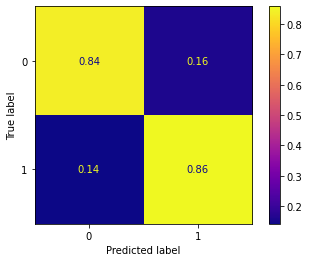

In [ ]:
evaluate(dt, X_tr, y_tr, X_te, y_te)

## **Experimenting with Max depth**

In [ ]:
# Setting up parameter grid for GridSearchCV
grid = {'max_depth': [5, 10, 15],
        'class_weight': ['balanced', None]
        }

In [ ]:
dt2 = DecisionTreeClassifier(random_state=42)
search = GridSearchCV(dt2, grid, scoring = ['f1', 'precision'], refit='f1')

In [ ]:
output = search.fit(X_tr, y_tr)

In [ ]:
output.best_params_

{'class_weight': 'balanced', 'max_depth': 10}

In [ ]:
dtc_best_est = output.best_estimator_
dtc_best_est.fit(X_tr, y_tr)


DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


,Accuracy,Precision,F1 Score
Training,95.26%,96.78%,95.93%
Testing,85.94%,89.12%,87.59%


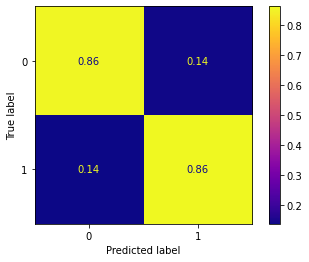

In [ ]:
evaluate(dtc_best_est, X_tr, y_tr, X_te, y_te)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


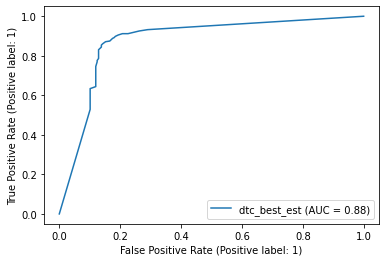

In [ ]:
plot_roc_curve(dtc_best_est, X_te, y_te, name='dtc_best_est')

## **Random Forest Classifier**

In [23]:
first_ran = RandomForestClassifier(class_weight='balanced', random_state=42)
first_ran.fit(X_tr, y_tr)

RandomForestClassifier(class_weight='balanced', random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


,Accuracy,Precision,F1 Score
Training,98.63%,99.0%,98.83%
Testing,90.62%,89.21%,92.13%


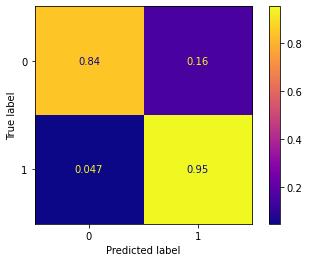

In [24]:
evaluate(first_ran, X_tr, y_tr, X_te, y_te)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


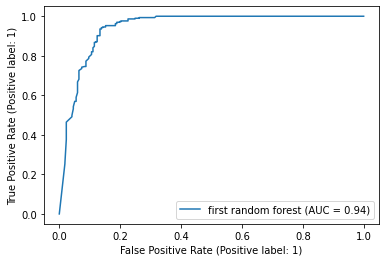

In [25]:
plot_roc_curve(first_ran, X_te, y_te, name='first random forest');

In [26]:
leaf_nodes = []
for est in first_ran.estimators_:
  leaf_nodes.append(est.tree_.n_leaves)
leaf_nodes
maxLeafNode = max(leaf_nodes)
minLeafNode = min(leaf_nodes)
print(maxLeafNode)
print(minLeafNode)

356
278


In [27]:
depths = []
for est in first_ran.estimators_:
  depths.append(est.tree_.max_depth)
depths
max_depth = max(depths)
min_depth = min(depths)
print(max_depth)
print(min_depth)

25
16


In [28]:
rand_ccpAlphas = []
for est in first_ran.estimators_:
  rand_ccpAlphas.append(est.cost_complexity_pruning_path(X_tr, y_tr))

max(rand_ccpAlphas[0]['ccp_alphas'])

0.1451015204658519

In [29]:
ccpA_max = []
ccpA_min = []
for i in range(len(rand_ccpAlphas)):
  ccpA_max.append(max(rand_ccpAlphas[i]['ccp_alphas']))
  ccpA_min.append(min(rand_ccpAlphas[i]['ccp_alphas']))
print(f'Max ccp alpha: {max(ccpA_max)}')
print(f'Minimum ccp alpha: {min(ccpA_min)}')

Max ccp alpha: 0.16736020835870802
Minimum ccp alpha: 0.0


In [30]:
# Setting up parameter grid for GridSearchCV
rf_grid = {'max_features': ['auto', 'sqrt', 'log2',None],
               'max_samples': [0.5, 0.8, 1,],
               'max_depth': [10, 17, 25],
               'max_leaf_nodes': [150, 250, 350]
               }

In [33]:
rand_grid = RandomForestClassifier(class_weight = 'balanced', random_state=42)
rand_search = GridSearchCV(rand_grid, rf_grid, scoring = ['f1', 'precision'], refit='f1')

In [34]:
rand_output = rand_search.fit(X_tr, y_tr)

In [35]:
rand_output.best_params_

{'max_depth': 25,
 'max_features': 'log2',
 'max_leaf_nodes': 250,
 'max_samples': 0.8}

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


,Accuracy,Precision,F1 Score
Training,97.95%,98.41%,98.25%
Testing,91.21%,89.31%,92.66%


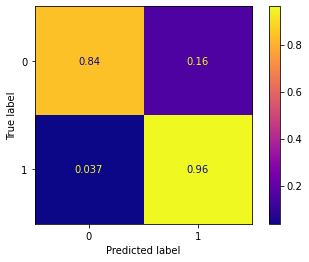

In [59]:
evaluate(rand_output, X_tr, y_tr, X_te, y_te)

## **Feature Importance Selection**

In [ ]:
feat = pd.DataFrame(first_ran.feature_importances_, columns=['Feature Importance'], index=X_tr.columns).sort_values(by=['Feature Importance'], ascending=False)

In [ ]:
feat.head()

,Feature Importance
PubchemFP803,0.04
PubchemFP770,0.04
PubchemFP812,0.03
PubchemFP833,0.02
PubchemFP749,0.02


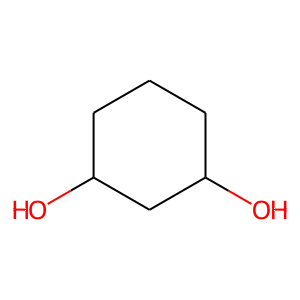

In [ ]:
FP803 = 'OC1CC(O)CCC1'
mol = Chem.MolFromSmiles(FP803)
AllChem.Compute2DCoords(mol)
Draw.MolToImage(mol)
#AllChem.GenerateDepictionMatching2DStructure(mol)

## **K-Nearest Neighbors Model**

In [86]:
knn = KNeighborsClassifier()

In [ ]:
cross_validate(knn, X_tr, y_tr, return_train_score = True)

{'fit_time': array([0.04899144, 0.03611135, 0.03535295, 0.03675318, 0.03650331]),
 'score_time': array([0.29878664, 0.26991916, 0.2771709 , 0.267694  , 0.27452755]),
 'test_score': array([0.86097561, 0.87560976, 0.88508557, 0.86797066, 0.85819071]),
 'train_score': array([0.90226023, 0.89981674, 0.91330891, 0.90781441, 0.90598291])}

In [97]:
knn_grid = {'n_neighbors': [5, 10, 15, 20],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'p': [1,2,3]}

In [98]:
knn_search = GridSearchCV(knn, knn_grid, scoring = ['f1', 'precision'], refit='f1')

In [99]:
knn_output = knn_search.fit(X_tr, y_tr)

In [100]:
knn_output.best_params_

{'algorithm': 'auto', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


,Accuracy,Precision,F1 Score
Training,98.63%,99.49%,98.83%
Testing,89.45%,88.01%,91.18%


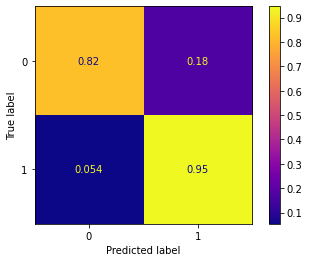

In [101]:
evaluate(knn_search, X_tr, y_tr, X_te, y_te)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


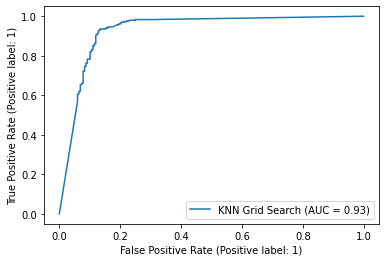

In [102]:
plot_roc_curve(knn_search, X_te, y_te, name='KNN Grid Search');